In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Phase Transition

## Hot start

In [2]:
dims = [16,32,64,128,256]
dims = [16,64,256]
subdir = 'Hot start'
B = {0: 'B0', 1: 'B1', -1:'B-1'}
H = B[0]
for dim in dims:
    globals()[f"df_{dim}"] = pd.read_csv(f"./Results/{subdir}/{H}/{dim}x{dim}_block_100err.csv")

In [12]:
def plots_th(err=True):
    fig, axs = plt.subplots(nrows=4, ncols=1, constrained_layout=False, figsize=(10,20))
    for ax, variable in zip(axs.flat, ['E', 'M', 'C', 'X']):
        for i, dim in enumerate(dims):
            T = globals()[f"df_{dim}"]['Temp'].values
            y = globals()[f"df_{dim}"][f'{variable}'].values
            yerr = globals()[f"df_{dim}"][f'{variable}_std'].values
            if variable == 'X':
                y = y
                yerr = yerr
            elif variable == 'E':
                y = 2*y
                yerr = yerr * 2
            elif variable == 'C':
                y = 4*y
                yerr = 2*yerr
            if err:
                ax.errorbar(T, y, yerr=yerr, alpha=0.5, label=f'{dim}')
            else:
                ax.plot(T, y, alpha=1-i/10, label=f'{dim}')
        if np.isin([f'{variable}_th'], globals()[f"df_{dim}"].columns):
            y_th = globals()[f"df_{dim}"][f'{variable}_th'].values
            ax.plot(T, y_th, alpha=1, label=f'Th')
        ax.legend()
        ax.set_xlabel(r'T / $T_0$')
        ax.set_ylabel(f'{variable} per site')
        #if variable in ['X']:
            #ax.set_xlim(2,3)
            #ax.set_yscale('log')
            

In [13]:
def plots_single(err=True, save=True):
    for variable in ['E', 'M', 'C', 'X']:
        plt.figure(figsize=(15,7))
        for i, dim in enumerate(dims):
            T = globals()[f"df_{dim}"]['Temp'].values
            y = globals()[f"df_{dim}"][f'{variable}'].values
            yerr = globals()[f"df_{dim}"][f'{variable}_std'].values
            if variable == 'X':
                y = y
                yerr = yerr
            if err:
                plt.errorbar(T, y, yerr=yerr, alpha=0.5, label=f'{dim}')
            else:
                plt.plot(T, y, alpha=1-i/10, label=f'{dim}')
        if np.isin([f'{variable}_th'], globals()[f"df_{dim}"].columns):
            y_th = globals()[f"df_{dim}"][f'{variable}_th'].values
            plt.plot(T, y_th, alpha=1, label=f'Th')
        plt.legend()
        plt.xlabel(r'T')
        if variable in ['C', '$\chi$']:
            plt.ylabel(fr'{variable}')
        else:
            plt.ylabel(f'{variable} / N')
        if save:
            plt.savefig(f'./Images/{variable}_plot.png')
            plt.clf()
            plt.close()
        #if variable in ['X']:
            #ax.set_xlim(2,3)
            #ax.set_yscale('log')

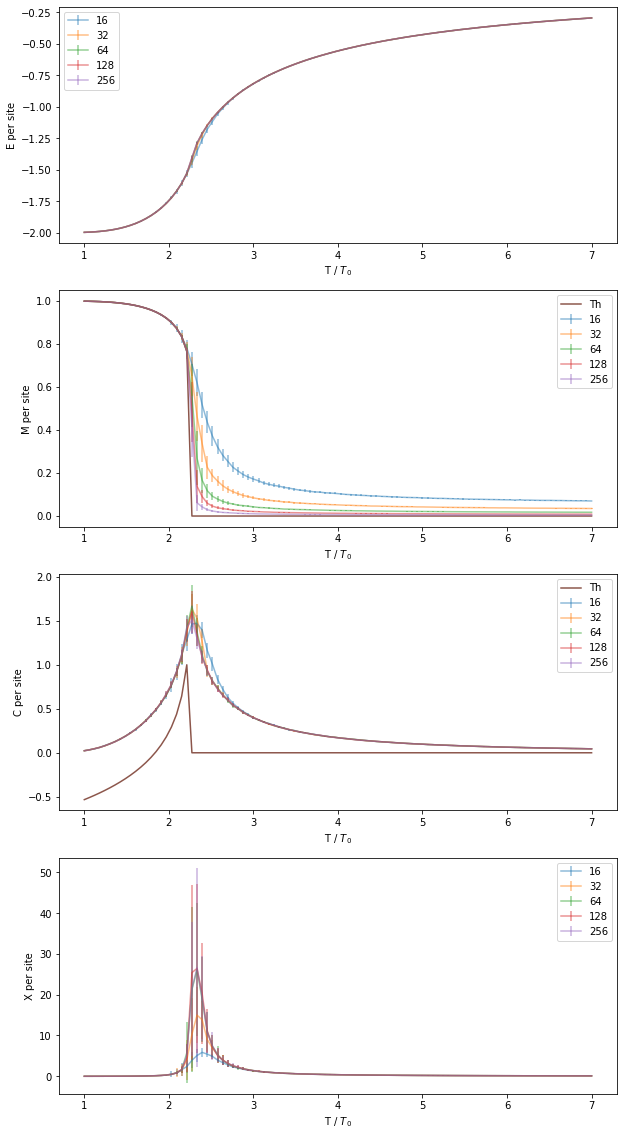

In [14]:
plots_th(True)

In [9]:
plots_single()

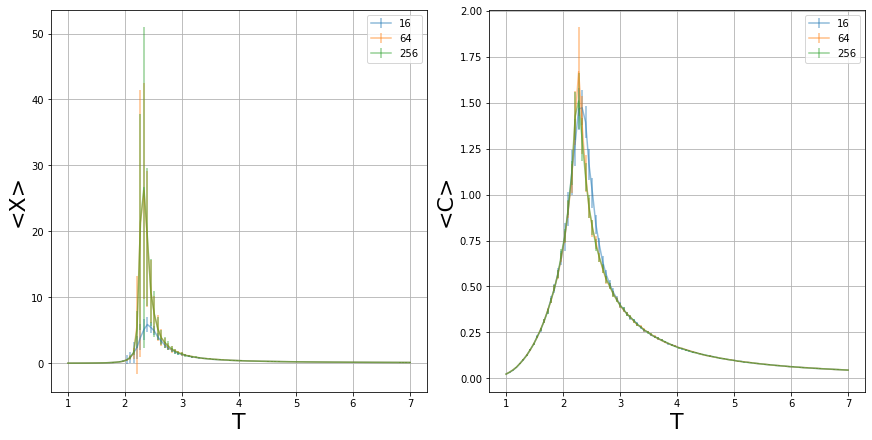

In [3]:
err = True
plt.rc('axes', labelsize=22)
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(4*3,3*2))
for ax, variable in zip(axs.flat, ['X', 'C']):
    for i, dim in enumerate(dims):
        T = globals()[f"df_{dim}"]['Temp'].values
        y = globals()[f"df_{dim}"][f'{variable}'].values
        yerr = globals()[f"df_{dim}"][f'{variable}_std'].values
        if variable == 'X':
            y = y
            yerr = yerr
        elif variable == 'E':
            y = 2*y
            yerr = yerr * 2
        elif variable == 'C':
            y = 4*y
            yerr = 2*yerr
        if err:
            ax.errorbar(T, y, yerr=yerr, alpha=0.5, label=f'{dim}')
        else:
            ax.plot(T, y, alpha=1-i/10, label=f'{dim}')
    '''if np.isin([f'{variable}_th'], globals()[f"df_{dim}"].columns):
        y_th = globals()[f"df_{dim}"][f'{variable}_th'].values
        ax.plot(T, y_th, alpha=1, label=f'Th')'''
    ax.legend()
    ax.set_xlabel(r'T')
    if variable == 'M':
        ax.set_ylabel(f'<|{variable}|>')
    else:
        ax.set_ylabel(f'<{variable}>')
    ax.grid()
plt.savefig('X_C_err.png', transparent=True)

##  Cold Start

In [5]:
for dim in dims:
    globals()[f"df_{dim}"] = pd.read_csv(f"./Results/{subdir}/{H}/{dim}x{dim}_block_100err.csv")

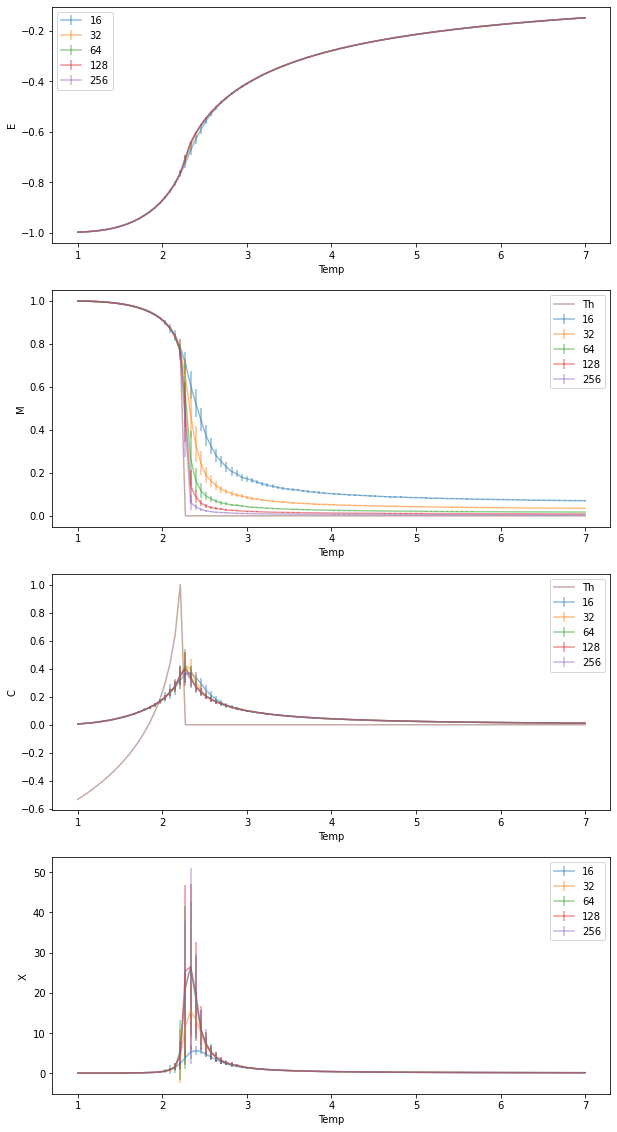

In [6]:
plots_th()

# Hysterisis

In [10]:
df_hyst = pd.read_csv(f"./Results/{subdir}/hysterisis_64_block.csv")

Text(0, 0.5, 'Energy per site')

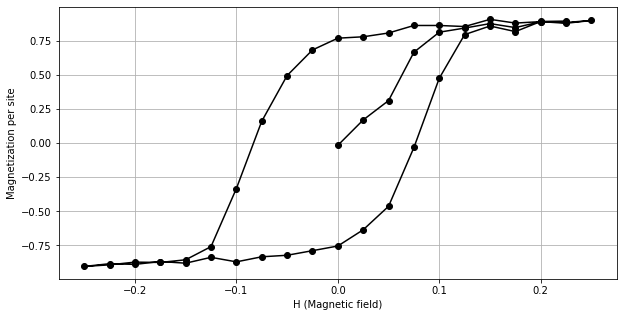

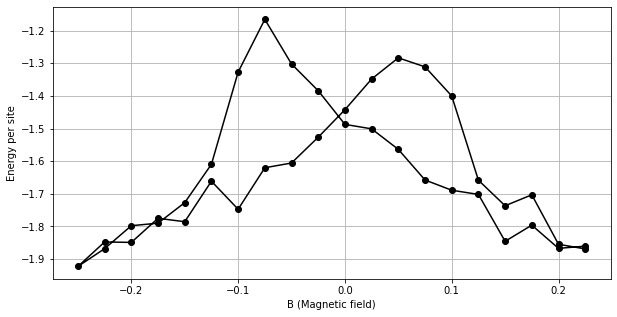

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df_hyst.B, df_hyst.M, '-o', c='k')
plt.grid()
plt.xlabel('H (Magnetic field)')
plt.ylabel('Magnetization per site')
plt.figure(figsize=(10,5))
plt.plot(df_hyst.B[11:], df_hyst.E[11:], '-o', c='k')
plt.grid()
plt.xlabel('B (Magnetic field)')
plt.ylabel('Energy per site')

# Entropy 

In [4]:
T = np.load('entropy.npz')['T']
E = np.load('entropy.npz')['E']
delta = np.load('entropy.npz')['delta']
gamma = np.load('entropy.npz')['gamma']

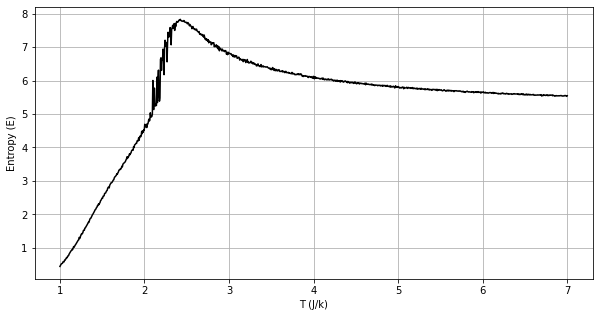

In [5]:
plt.figure(figsize=(10,5))
plt.plot(T, E, 'k')
plt.xlabel('T (J/k)')
plt.ylabel('Entropy (E)')
plt.grid()

In [10]:
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.cm as cm

mymap = mcolors.LinearSegmentedColormap.from_list('mycolors',['#00ff00','red'])

# Using contourf to provide my colorbar info, then clearing the figure
Z = [[0,0],[0,0]]
levels = range(1,7 + 1,1)
CS3 = plt.contourf(Z, levels, cmap=mymap)
plt.clf();

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Complexity plot')

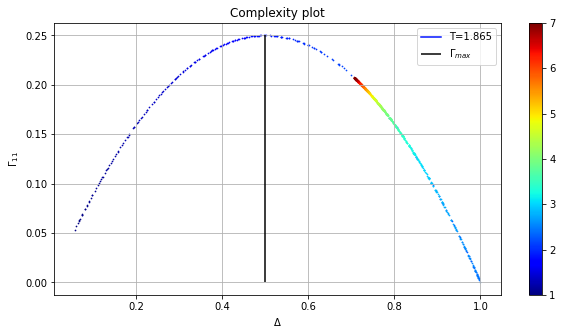

In [11]:
plt.figure(figsize=(10,5))

normalize = mcolors.Normalize(vmin=T.min(), vmax=T.max())
colormap = cm.jet

for x,y,z in zip(delta,gamma,T):
    if y == gamma.max():
        plt.plot(x,y,color=colormap(normalize(z)), label=f'T={z:.3f}')
        plt.vlines(x, 0,y, color='k', label=r'$\Gamma_{max}$')
    else:
        plt.scatter(x,y,color=colormap(normalize(z)), s=0.5)

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(T)
cbar = plt.colorbar(scalarmappaple)
plt.legend()
plt.grid()
plt.xlabel(r'$\Delta$')
plt.ylabel(r'$\Gamma_{11}$')
plt.title(r'Complexity plot')
#plt.savefig('Images/complexity_plot.png')

## Entropy using lattice

In [12]:
T = np.load('entropy_from_lattice.npz')['T']
E = np.load('entropy_from_lattice.npz')['E']

In [ ]:
T = np.load('entropy_from_lattice.npz')['T']
E = np.load('entropy_from_lattice.npz')['E']

In [13]:
delta = E / np.log2(2)
gamma = delta *  (1 - delta)

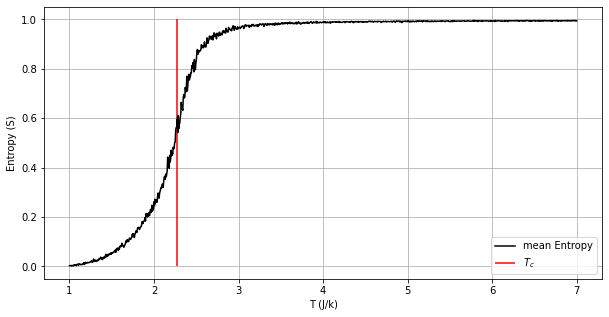

In [14]:
plt.figure(figsize=(10,5))
plt.plot(T, E, 'k', label='mean Entropy')
plt.vlines(2/(np.log(1+np.sqrt(2))), 0,1, color='r', label=r'$T_c$')
plt.legend(loc='lower right')
plt.xlabel('T (J/k)')
plt.ylabel('Entropy (S)')
plt.grid()
plt.savefig('Images/entropy vs T.png')

In [15]:
import matplotlib as mpl

mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['#00ff00','red'])

# Using contourf to provide my colorbar info, then clearing the figure
Z = [[0,0],[0,0]]
levels = range(1,7 + 1,1)
CS3 = plt.contourf(Z, levels, cmap=mymap)
plt.clf();

<Figure size 432x288 with 0 Axes>

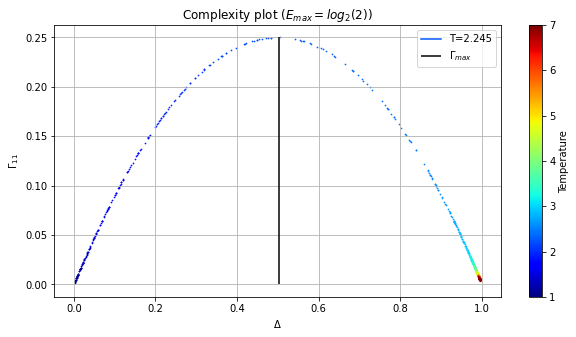

In [16]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

plt.figure(figsize=(10,5))

normalize = mcolors.Normalize(vmin=T.min(), vmax=T.max())
colormap = cm.jet

for x,y,z in zip(delta,gamma,T):
    # setting rgb color based on z normalized to my range
    '''r = (float(z)-1.0)/(7.0-1.0)
    g = 1-r
    b = 0'''
    if y == gamma.max():
        plt.plot(x,y,color=colormap(normalize(z)), label=f'T={z:.3f}')
        plt.vlines(x, 0,y, color='k', label=r'$\Gamma_{max}$')
    else:
        plt.scatter(x,y,color=colormap(normalize(z)), s=0.5)
    

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(T)
cbar = plt.colorbar(scalarmappaple)

plt.legend()
cbar.ax.set_ylabel('Temperature')
plt.xlabel(r'$\Delta$')
plt.grid()
plt.ylabel(r'$\Gamma_{11}$')
plt.title(r'Complexity plot ($E_{max} = log_2(2)$)')
#plt.savefig('Images/complexity_plot.png')

KeyboardInterrupt: 

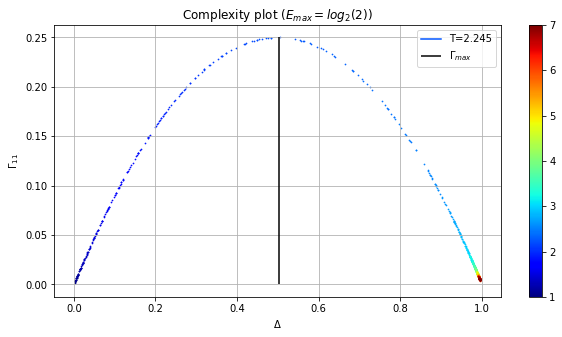

In [9]:
plt.figure(figsize=(10,5))

normalize = mcolors.Normalize(vmin=T.min(), vmax=T.max())
colormap = cm.jet

for x,y,z in zip(delta,gamma,T):
    if y == gamma.max():
        plt.plot(x,y,color=colormap(normalize(z)), label=f'T={z:.3f}')
        plt.vlines(x, 0,y, color='k', label=r'$\Gamma_{max}$')
    else:
        plt.scatter(x,y,color=colormap(normalize(z)), s=0.5)

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(T)
cbar = plt.colorbar(scalarmappaple)
plt.legend()
plt.grid()
plt.xlabel(r'$\Delta$')
plt.ylabel(r'$\Gamma_{11}$')
plt.title(r'Complexity plot ($E_{max} = log_2(2)$)')
plt.savefig('Images/complexity_plot_lattice_blackE.png')

# ACF

Loading data in order to make the analysis

In [24]:
m1 = np.load('t1_100.npz')['arr_0']
m2 = np.load('t24_100.npz')['arr_0']
m3 = np.load('t4_100.npz')['arr_0']

In [3]:
m1 = np.load('m_t15.npz')['m1']
m2 = np.load('m_t24.npz')['m2']
m3 = np.load('m_t4.npz')['m3']

Calculating ACF using the FFT

In [25]:
%%time 
from statsmodels.tsa.stattools import acf

acf1 = acf(m1[20000000:], nlags=len(m1[20000000:]), fft=True)
acf2 = acf(m2[20000000:], nlags=len(m2[20000000:]), fft=True)
acf3 = acf(m3[20000000:], nlags=len(m3[20000000:]), fft=True)

Wall time: 59.4 s


In [29]:
%%time 
from statsmodels.tsa.stattools import acf

acf1 = acf(m1[:], nlags=len(m1[:]), fft=True)
acf2 = acf(m2[:], nlags=len(m2[:]), fft=True)
acf3 = acf(m3[:], nlags=len(m3[:]), fft=True)

Wall time: 3.62 s


In [6]:
m1.size / 16 **2 
acf1.size / 16 **2 

10000.0

In [7]:
L = 16
t = np.arange(len(m1)) / L**2

fig = plt.figure(figsize=(15,6), constrained_layout=True)
fig, axs = plt.subplots(3, 1, figsize=(9, 9))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(f'Plot title {i}')

gs = plt.GridSpec(3,2, figure=fig)

T = [1.5,2.4,4]
for i in range(3):
    ax1 = fig.add_subplot(gs[i, 0])
    ax1.plot(np.arange(len(m1))[::1000] / L**2, globals()[f'm{i+1}'][::1000], c='k')
    ax1.set_ylabel('M')
    ax1.grid()
    
    ax2 = fig.add_subplot(gs[i, 1])
    ax2.plot(np.arange(len(acf1))[::1000] / L**2, globals()[f'acf{i+1}'][::1000], c='k')
    ax2.set_ylabel('ACF')
    ax2.grid()
    ax1.suptitle(f'T={T[i]}')
    if i in [0, 2]:
        ax2.set_xlim(-0.5, 100)

ax2.set_xlabel('lags')
ax1.set_xlabel('time (Montecarlo steps per sites)')
#plt.savefig('trace_acf_with_burn.png', transparent=True)

AttributeError: 'AxesSubplot' object has no attribute 'suptitle'

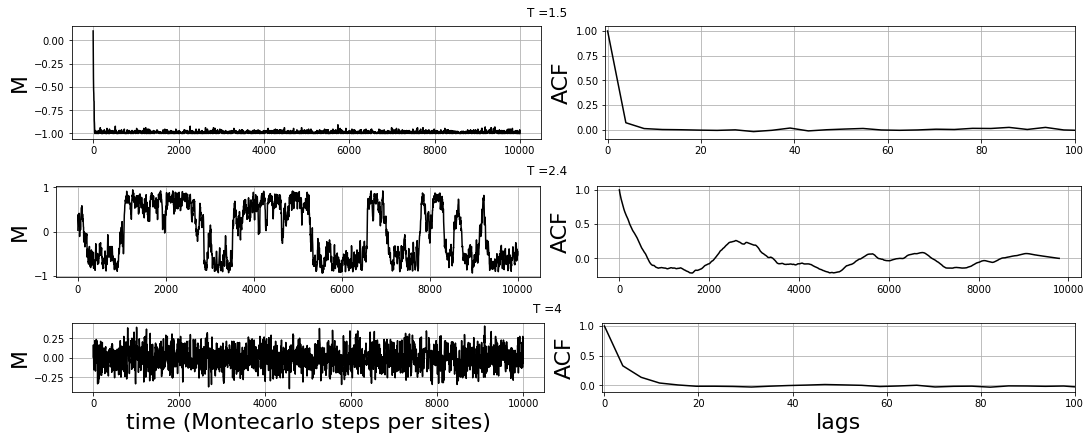

In [25]:
L = 16
t = np.arange(len(m1)) / L**2

plt.rc('axes', labelsize=22)

fig = plt.figure(figsize=(15,6), constrained_layout=True)

subfigs = fig.subfigures(nrows=3, ncols=1)
T = [1.5,2.4,4]

for row, subfig in enumerate(subfigs):
    if row == 0:
        fig.suptitle(f'T ={T[row]}')
    else:
        subfig.suptitle(f'T ={T[row]}')
    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=2)
    axs[0].plot(np.arange(len(m1))[::1000] / L**2, globals()[f'm{row+1}'][::1000], c='k')
    axs[0].set_ylabel('M')
    axs[0].grid()
    
    axs[1].plot(np.arange(len(acf1))[::1000] / L**2, globals()[f'acf{row+1}'][::1000], c='k')
    axs[1].set_ylabel('ACF')
    axs[1].grid()
    if row in [0, 2]:
        axs[1].set_xlim(-0.5, 100)

    

axs[1].set_xlabel('lags')
axs[0].set_xlabel('time (Montecarlo steps per sites)')
plt.savefig('trace_acf.png', transparent=True)

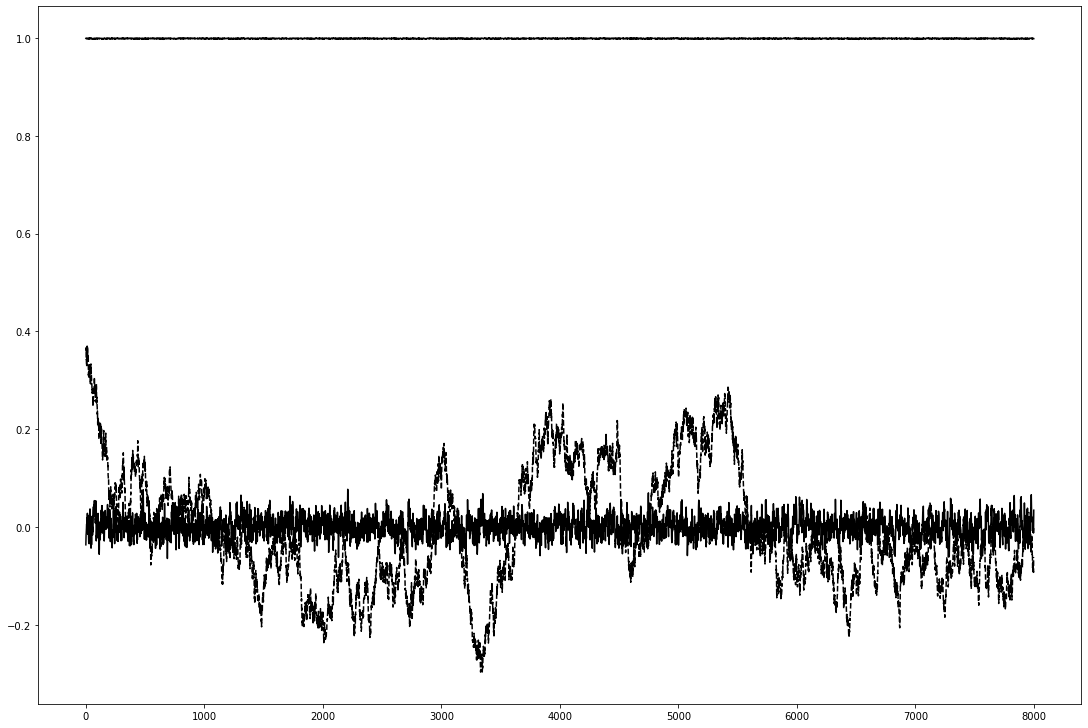

In [10]:
plt.figure(figsize=(15,10), constrained_layout=True)
plt.plot(t[::10000], m1[20000000::10000], c='k')
plt.plot(t[::10000], m2[20000000::10000], '--k')
plt.plot(t[::10000], m3[20000000::10000], c='k')


## Fit ACF in log scale 

In [27]:
from scipy.optimize import curve_fit

def f(x, t):
    return np.exp(-x/t)

def f(x, t, a): 
    return -x / t + a  

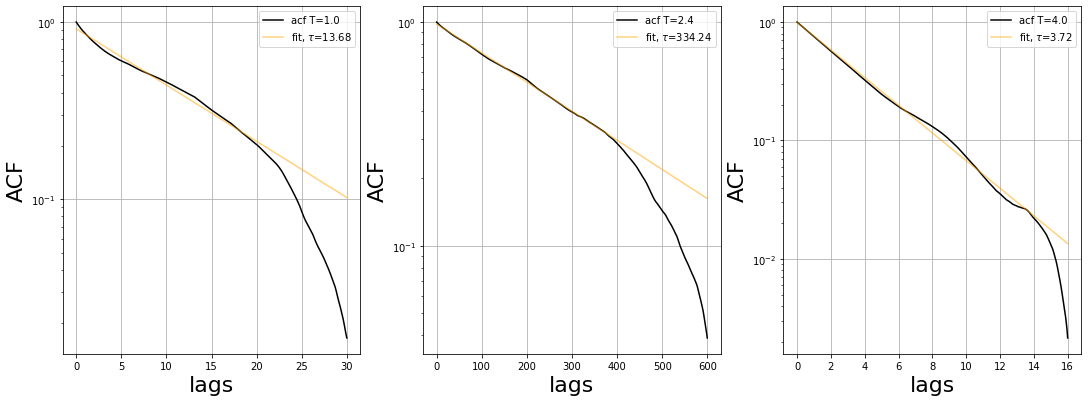

In [30]:
t = np.arange(len(m1)) / 16**2

plt.rc('axes', labelsize=22)

fig = plt.figure(figsize=(15,5.48), constrained_layout=True)
gs = plt.GridSpec(1,3, figure=fig)
dic={1.0: 8, 2.4: 200, 4: 2}

axs = []
for i, j in zip(gs, ['ax1', 'ax2', 'ax3']):
    globals()[j] = fig.add_subplot(i)
    axs.append(globals()[j])
# acf2 400/500
for arr, t_fin, T, ax in zip([acf1, acf2, acf3], [30, 600, 16], [1.,2.4,4.0], axs):
    
    idx = np.where(t < t_fin - dic[T])
    log = np.log(arr[idx])
    popt, pcov = curve_fit(f, t[idx], log)
    
    idx = np.where(t < t_fin)
    ax.plot(t[idx], arr[idx], 'k', label=f'acf T={T}')
    txt = fr'fit, $\tau$={popt[0]:.2f}'
    ax.plot(t[idx], np.exp(f(t[idx], *popt)), c='orange', label=txt, alpha=0.5)
    ax.legend()
    ax.set_xlabel('lags')
    ax.set_ylabel('ACF')
    ax.grid()
    ax.set_yscale('log')

plt.savefig('acf_noburn.png', transparent=True)